In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
datos = {
    "Fecha": pd.date_range(start="2025-01-01", periods=12, freq="D"),
    "Producto": [
        "Helado Chocolate", "Helado Vainilla", None,
        "Helado Oreo", "Paletas", "Brownie",
        "Helado Chocolate", "Helado Fresa", "Paletas",
        "Cheesecake", "Helado Oreo", "Brownie"
    ],
    "Categoria": [
        "Helados", "Helados", "Helados",
        "Helados", "Paletas", "Postres",
        "Helados", "Helados", "Paletas",
        "Postres", "Helados", "Postres"
    ],
    "Precio": [180, 150, 160, None, 120, 220, -180, 160, 120, 250, 200, 220],
    "Ventas": [30, None, 20, 25, -5, 15, 40, 22, 50, 10, 28, None]
}

df = pd.DataFrame(datos)
df

,Fecha,Producto,Categoria,Precio,Ventas
0,2025-01-01,Helado Chocolate,Helados,180.0,30.0
1,2025-01-02,Helado Vainilla,Helados,150.0,NaN
2,2025-01-03,None,Helados,160.0,20.0
3,2025-01-04,Helado Oreo,Helados,NaN,25.0
4,2025-01-05,Paletas,Paletas,120.0,-5.0
5,2025-01-06,Brownie,Postres,220.0,15.0
6,2025-01-07,Helado Chocolate,Helados,-180.0,40.0
7,2025-01-08,Helado Fresa,Helados,160.0,22.0
8,2025-01-09,Paletas,Paletas,120.0,50.0
9,2025-01-10,Cheesecake,Postres,250.0,10.0


In [13]:
df["Producto"] = df["Producto"].fillna("Desconocido")
df["Precio"] = df["Precio"].fillna(df["Precio"].mean()).abs()
df["Ventas"] = df["Ventas"].fillna(0).abs()
df

,Fecha,Producto,Categoria,Precio,Ventas
0,2025-01-01,Helado Chocolate,Helados,180.000000,30.0
1,2025-01-02,Helado Vainilla,Helados,150.000000,0.0
2,2025-01-03,Desconocido,Helados,160.000000,20.0
3,2025-01-04,Helado Oreo,Helados,145.454545,25.0
4,2025-01-05,Paletas,Paletas,120.000000,5.0
5,2025-01-06,Brownie,Postres,220.000000,15.0
6,2025-01-07,Helado Chocolate,Helados,180.000000,40.0
7,2025-01-08,Helado Fresa,Helados,160.000000,22.0
8,2025-01-09,Paletas,Paletas,120.000000,50.0
9,2025-01-10,Cheesecake,Postres,250.000000,10.0


In [14]:
df["Ingreso"] = df["Precio"] * df["Ventas"]
df

,Fecha,Producto,Categoria,Precio,Ventas,Ingreso
0,2025-01-01,Helado Chocolate,Helados,180.000000,30.0,5400.000000
1,2025-01-02,Helado Vainilla,Helados,150.000000,0.0,0.000000
2,2025-01-03,Desconocido,Helados,160.000000,20.0,3200.000000
3,2025-01-04,Helado Oreo,Helados,145.454545,25.0,3636.363636
4,2025-01-05,Paletas,Paletas,120.000000,5.0,600.000000
5,2025-01-06,Brownie,Postres,220.000000,15.0,3300.000000
6,2025-01-07,Helado Chocolate,Helados,180.000000,40.0,7200.000000
7,2025-01-08,Helado Fresa,Helados,160.000000,22.0,3520.000000
8,2025-01-09,Paletas,Paletas,120.000000,50.0,6000.000000
9,2025-01-10,Cheesecake,Postres,250.000000,10.0,2500.000000


In [15]:
ingreso_total = df["Ingreso"].sum()
ticket_promedio = df["Ingreso"].mean()

ingreso_total, ticket_promedio

(np.float64(40956.36363636363), np.float64(3413.0303030303025))

In [16]:
resumen_categoria = df.groupby("Categoria")["Ingreso"].sum()
resumen_categoria

Categoria
Helados    28556.363636
Paletas     6600.000000
Postres     5800.000000
Name: Ingreso, dtype: float64

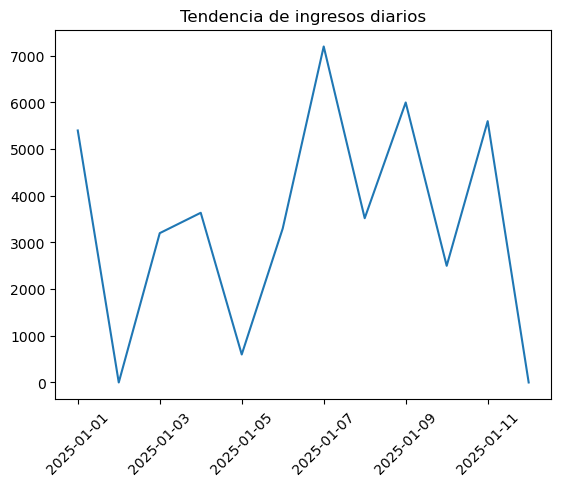

In [20]:
ventas_diarias = df.groupby("Fecha")["Ingreso"].sum()

plt.plot(ventas_diarias.index, ventas_diarias.values)
plt.title("Tendencia de ingresos diarios")
plt.xticks(rotation=45)
plt.show()

In [22]:
df.groupby("Producto")["Ingreso"].sum().sort_values(ascending=False)

Producto
Helado Chocolate    12600.000000
Helado Oreo          9236.363636
Paletas              6600.000000
Helado Fresa         3520.000000
Brownie              3300.000000
Desconocido          3200.000000
Cheesecake           2500.000000
Helado Vainilla         0.000000
Name: Ingreso, dtype: float64

## Conclusiones del análisis

- La categoría con mayor ingreso es **Helados**.
- El producto más rentable es **Helado Chocolate**.
- Se observa variabilidad diaria en los ingresos.
- Se recomienda reforzar los productos de mayor margen
  y monitorear ventas diariamente.


In [23]:
df.to_csv("Ventas_analisis_final.csv", index=False)